In [108]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVR
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_curve, auc
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import time
import xgboost as xgb
from xgboost import XGBRegressor
from xgboost import plot_importance
import scipy.optimize as optim

# Creating Dataset for Modeling

In [109]:
usa = pd.read_csv("data/US_2020-05-06.csv") 
display(usa.info())
usa.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72 entries, 0 to 71
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   country        72 non-null     object
 1   date           72 non-null     object
 2   confirmed      72 non-null     int64 
 3   deaths         72 non-null     int64 
 4   new_confirmed  72 non-null     int64 
 5   new_deaths     72 non-null     int64 
 6   tagged_day     72 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 4.1+ KB


None

,country,date,confirmed,deaths,new_confirmed,new_deaths,tagged_day
0,US,2/24/20,51,0,36,0,1
1,US,2/25/20,51,0,0,0,2
2,US,2/26/20,57,0,6,0,3
3,US,2/27/20,58,0,1,0,4
4,US,2/28/20,60,0,2,0,5


In [110]:
kor = pd.read_csv("data/SouthKorea_2020-05-06.csv") 
display(kor.info())
kor.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90 entries, 0 to 89
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   country        90 non-null     object
 1   date           90 non-null     object
 2   confirmed      90 non-null     int64 
 3   deaths         90 non-null     int64 
 4   new_confirmed  90 non-null     int64 
 5   new_deaths     90 non-null     int64 
 6   tagged_day     90 non-null     int64 
dtypes: int64(5), object(2)
memory usage: 5.0+ KB


None

,country,date,confirmed,deaths,new_confirmed,new_deaths,tagged_day
0,"Korea, South",2/6/20,23,0,4,0,1
1,"Korea, South",2/7/20,24,0,1,0,2
2,"Korea, South",2/8/20,24,0,0,0,3
3,"Korea, South",2/9/20,25,0,1,0,4
4,"Korea, South",2/10/20,27,0,2,0,5


In [111]:
# joining on vertical stacks (axi s0 for addition to rows) for df's of kor & usa
df = pd.concat([usa, kor], axis=0)
display(df.info())
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 0 to 89
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   country        162 non-null    object
 1   date           162 non-null    object
 2   confirmed      162 non-null    int64 
 3   deaths         162 non-null    int64 
 4   new_confirmed  162 non-null    int64 
 5   new_deaths     162 non-null    int64 
 6   tagged_day     162 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 10.1+ KB


None

,country,date,confirmed,deaths,new_confirmed,new_deaths,tagged_day
0,US,2/24/20,51,0,36,0,1
1,US,2/25/20,51,0,0,0,2
2,US,2/26/20,57,0,6,0,3
3,US,2/27/20,58,0,1,0,4
4,US,2/28/20,60,0,2,0,5
...,...,...,...,...,...,...,...
85,"Korea, South",5/1/20,10780,250,6,2,86
86,"Korea, South",5/2/20,10793,250,13,0,87
87,"Korea, South",5/3/20,10801,252,8,2,88
88,"Korea, South",5/4/20,10804,254,3,2,89


In [112]:
# change date to type datetime
df['date'] = pd.to_datetime(df.date)
display(df.info())
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 0 to 89
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   country        162 non-null    object        
 1   date           162 non-null    datetime64[ns]
 2   confirmed      162 non-null    int64         
 3   deaths         162 non-null    int64         
 4   new_confirmed  162 non-null    int64         
 5   new_deaths     162 non-null    int64         
 6   tagged_day     162 non-null    int64         
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 10.1+ KB


None

,country,date,confirmed,deaths,new_confirmed,new_deaths,tagged_day
0,US,2020-02-24,51,0,36,0,1
1,US,2020-02-25,51,0,0,0,2
2,US,2020-02-26,57,0,6,0,3
3,US,2020-02-27,58,0,1,0,4
4,US,2020-02-28,60,0,2,0,5
...,...,...,...,...,...,...,...
85,"Korea, South",2020-05-01,10780,250,6,2,86
86,"Korea, South",2020-05-02,10793,250,13,0,87
87,"Korea, South",2020-05-03,10801,252,8,2,88
88,"Korea, South",2020-05-04,10804,254,3,2,89


In [113]:
#adding country code column 
def country_code(row):
    if row['country'] == 'US':
        return 'USA'
    if row['country'] == 'Korea, South':
        return 'KOR'

In [114]:
df.apply(lambda row: country_code(row), axis=1)

0     USA
1     USA
2     USA
3     USA
4     USA
     ... 
85    KOR
86    KOR
87    KOR
88    KOR
89    KOR
Length: 162, dtype: object

In [115]:
df['country code'] = df.apply(lambda row: country_code(row), axis=1)

# Reading Our world data


In [116]:
testing = pd.read_csv("data/covid-19-tests-deaths-scatter-with-comparisons_2020May07.csv")
display(testing.info())
testing.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9437 entries, 0 to 9436
Data columns (total 5 columns):
 #   Column                                                                          Non-Null Count  Dtype  
---  ------                                                                          --------------  -----  
 0   Entity                                                                          9437 non-null   object 
 1   Code                                                                            8737 non-null   object 
 2   Date                                                                            9437 non-null   object 
 3   Total tests per million people                                                  4216 non-null   float64
 4   Total confirmed deaths due to COVID-19 per million people (deaths per million)  8223 non-null   float64
dtypes: float64(2), object(3)
memory usage: 368.8+ KB


None

,Entity,Code,Date,Total tests per million people,Total confirmed deaths due to COVID-19 per million people (deaths per million)
0,Afghanistan,AFG,24-Mar-20,NaN,0.026
1,Afghanistan,AFG,25-Mar-20,NaN,0.026
2,Afghanistan,AFG,26-Mar-20,NaN,0.026
3,Afghanistan,AFG,27-Mar-20,NaN,0.026
4,Afghanistan,AFG,28-Mar-20,NaN,0.051


In [117]:
# change date to type datetime
testing['Date'] = pd.to_datetime(testing.Date)
display(testing.info())
testing.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9437 entries, 0 to 9436
Data columns (total 5 columns):
 #   Column                                                                          Non-Null Count  Dtype         
---  ------                                                                          --------------  -----         
 0   Entity                                                                          9437 non-null   object        
 1   Code                                                                            8737 non-null   object        
 2   Date                                                                            9437 non-null   datetime64[ns]
 3   Total tests per million people                                                  4216 non-null   float64       
 4   Total confirmed deaths due to COVID-19 per million people (deaths per million)  8223 non-null   float64       
dtypes: datetime64[ns](1), float64(2), object(2)
memory usage: 368.8+ KB


None

,Entity,Code,Date,Total tests per million people,Total confirmed deaths due to COVID-19 per million people (deaths per million)
0,Afghanistan,AFG,2020-03-24,NaN,0.026
1,Afghanistan,AFG,2020-03-25,NaN,0.026
2,Afghanistan,AFG,2020-03-26,NaN,0.026
3,Afghanistan,AFG,2020-03-27,NaN,0.026
4,Afghanistan,AFG,2020-03-28,NaN,0.051


# Joining 3 df's into 1

In [118]:
df2 = pd.merge(left=df, right=testing, how='left', left_on=['date','country code'], right_on=['Date', 'Code'])
display(df2.info())
df2

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 0 to 161
Data columns (total 13 columns):
 #   Column                                                                          Non-Null Count  Dtype         
---  ------                                                                          --------------  -----         
 0   country                                                                         162 non-null    object        
 1   date                                                                            162 non-null    datetime64[ns]
 2   confirmed                                                                       162 non-null    int64         
 3   deaths                                                                          162 non-null    int64         
 4   new_confirmed                                                                   162 non-null    int64         
 5   new_deaths                                                                    

None

,country,date,confirmed,deaths,new_confirmed,new_deaths,tagged_day,country code,Entity,Code,Date,Total tests per million people,Total confirmed deaths due to COVID-19 per million people (deaths per million)
0,US,2020-02-24,51,0,36,0,1,USA,NaN,NaN,NaT,NaN,NaN
1,US,2020-02-25,51,0,0,0,2,USA,NaN,NaN,NaT,NaN,NaN
2,US,2020-02-26,57,0,6,0,3,USA,NaN,NaN,NaT,NaN,NaN
3,US,2020-02-27,58,0,1,0,4,USA,NaN,NaN,NaT,NaN,NaN
4,US,2020-02-28,60,0,2,0,5,USA,NaN,NaN,NaT,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,"Korea, South",2020-05-01,10780,250,6,2,86,KOR,South Korea,KOR,2020-05-01,12153.0,4.837
158,"Korea, South",2020-05-02,10793,250,13,0,87,KOR,South Korea,KOR,2020-05-02,12241.0,4.876
159,"Korea, South",2020-05-03,10801,252,8,2,88,KOR,South Korea,KOR,2020-05-03,12307.0,4.876
160,"Korea, South",2020-05-04,10804,254,3,2,89,KOR,South Korea,KOR,2020-05-04,12365.0,4.915


In [119]:
df3 = df2.copy(deep=True)

# needed cols: 'country code','date','tagged_day','Total tests per million people','confirmed','deaths','new_confirmed','new_deaths', 
#                    'Total confirmed deaths due to COVID-19 per million people (deaths per million)'

df3_dropped_cols = ['country', 'Entity', 'Code', 'Date']
df3 = df3.drop(labels=df3_dropped_cols, axis=1)
df3

,date,confirmed,deaths,new_confirmed,new_deaths,tagged_day,country code,Total tests per million people,Total confirmed deaths due to COVID-19 per million people (deaths per million)
0,2020-02-24,51,0,36,0,1,USA,NaN,NaN
1,2020-02-25,51,0,0,0,2,USA,NaN,NaN
2,2020-02-26,57,0,6,0,3,USA,NaN,NaN
3,2020-02-27,58,0,1,0,4,USA,NaN,NaN
4,2020-02-28,60,0,2,0,5,USA,NaN,NaN
...,...,...,...,...,...,...,...,...,...
157,2020-05-01,10780,250,6,2,86,KOR,12153.0,4.837
158,2020-05-02,10793,250,13,0,87,KOR,12241.0,4.876
159,2020-05-03,10801,252,8,2,88,KOR,12307.0,4.876
160,2020-05-04,10804,254,3,2,89,KOR,12365.0,4.915


In [120]:
df4 = df3.copy(deep=True)
display(df4.shape)
display(df4.info())

(162, 9)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 0 to 161
Data columns (total 9 columns):
 #   Column                                                                          Non-Null Count  Dtype         
---  ------                                                                          --------------  -----         
 0   date                                                                            162 non-null    datetime64[ns]
 1   confirmed                                                                       162 non-null    int64         
 2   deaths                                                                          162 non-null    int64         
 3   new_confirmed                                                                   162 non-null    int64         
 4   new_deaths                                                                      162 non-null    int64         
 5   tagged_day                                                                     

None

In [121]:
#Removing NaN's
df4['Total tests per million people'] = df4['Total tests per million people'].replace(to_replace =np.NaN, value=0)
df4['Total confirmed deaths due to COVID-19 per million people (deaths per million)'] = df4['Total confirmed deaths due to COVID-19 per million people (deaths per million)'].replace(to_replace =np.NaN, value=0)
display(df4.shape)
display(df4.info())
df4.head()

(162, 9)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 162 entries, 0 to 161
Data columns (total 9 columns):
 #   Column                                                                          Non-Null Count  Dtype         
---  ------                                                                          --------------  -----         
 0   date                                                                            162 non-null    datetime64[ns]
 1   confirmed                                                                       162 non-null    int64         
 2   deaths                                                                          162 non-null    int64         
 3   new_confirmed                                                                   162 non-null    int64         
 4   new_deaths                                                                      162 non-null    int64         
 5   tagged_day                                                                     

None

,date,confirmed,deaths,new_confirmed,new_deaths,tagged_day,country code,Total tests per million people,Total confirmed deaths due to COVID-19 per million people (deaths per million)
0,2020-02-24,51,0,36,0,1,USA,0.0,0.0
1,2020-02-25,51,0,0,0,2,USA,0.0,0.0
2,2020-02-26,57,0,6,0,3,USA,0.0,0.0
3,2020-02-27,58,0,1,0,4,USA,0.0,0.0
4,2020-02-28,60,0,2,0,5,USA,0.0,0.0


# Creating two subsets for each country USA & South Korea

In [122]:
dfkor = df4.loc[df4['country code'] == 'KOR']
dfusa = df4.loc[df4['country code'] == 'USA']

# South Korea Visualizations

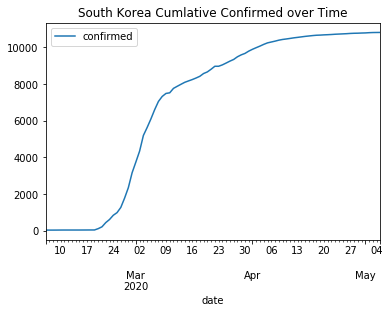

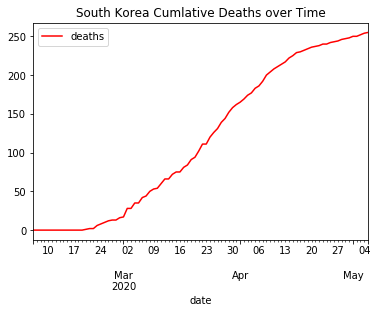

In [123]:
dfkor.plot(x='date', y='confirmed' , title = "South Korea Cumlative Confirmed over Time") 
dfkor.plot(x='date', y='deaths', color = 'red', title= "South Korea Cumlative Deaths over Time")



# USA Visualizations

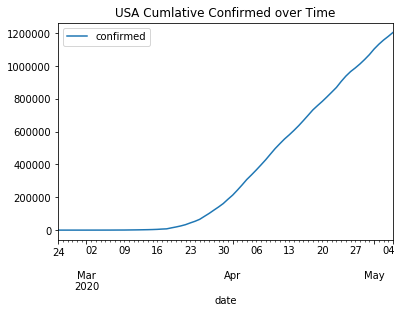

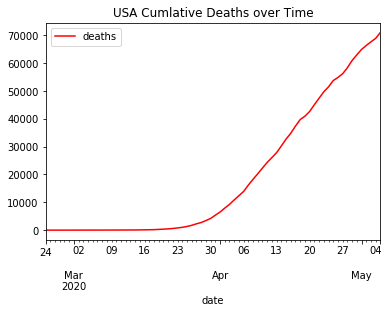

In [124]:
dfusa.plot(x='date', y='confirmed', title = "USA Cumlative Confirmed over Time" ) 
dfusa.plot(x='date', y='deaths', color = 'red',  title = "USA Cumlative Deaths over Time")

# USA & South Korea Visualizations
- We notce that Korea initally has more testing density, but then U.S passes them. This early start may be the reason S. Korea had more success mitigating the spread as seen in the graphs above and below.

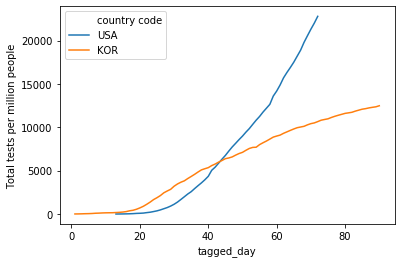

In [125]:
sns.lineplot(x='tagged_day', y='Total tests per million people', data = df3, hue='country code')
# title = "Total tests per million people by Country Over Time Tagged Day" )


Text(0.5, 1.0, 'Cumulative Confirmed Cases by Country Over Time Tagged Day')

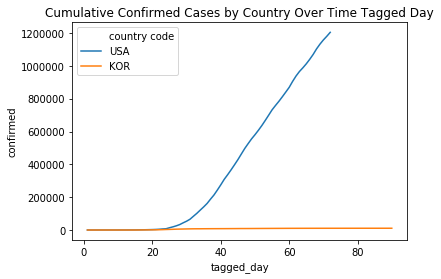

In [130]:
sns.lineplot(x='tagged_day', y='confirmed', data = df3, hue='country code').set_title("Cumulative Confirmed Cases by Country Over Time Tagged Day")


Text(0.5, 1.0, 'Cumulative Deaths by Country Over Time Tagged Day')

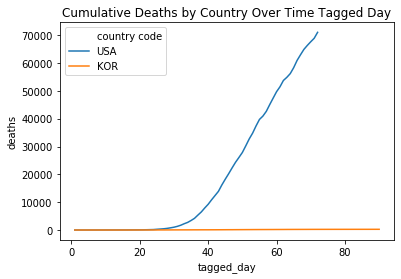

In [132]:
sns.lineplot(x='tagged_day', y='deaths', data = df3, hue='country code').set_title("Cumulative Deaths by Country Over Time Tagged Day")


# Split Test & Train South Korea

In [133]:
# dropping new_deaths and using deaths(cumulative) as repsonse variable
# dropping new_confirmed, since using cumulative values for confirmed cases & deaths
# dropping total confirmed deaths pe rmillion, directly correlated with deaths
# country code, since df contains all values of same country
# removing date, since tagged_day is added 
# using deaths as response variable Y
X_col_dropped = ['date','deaths','new_confirmed', 'new_deaths', 'country code',
                'Total confirmed deaths due to COVID-19 per million people (deaths per million)']
X_kor = dfkor.drop(labels=X_col_dropped, axis=1)

X_col_names = X_kor.columns.values
X_col_names

array(['confirmed', 'tagged_day', 'Total tests per million people'],
      dtype=object)

In [134]:
y_kor = dfkor.loc[:,'deaths']
y_kor.head()

72    0
73    0
74    0
75    0
76    0
Name: deaths, dtype: int64

In [135]:
X_train_kor, X_test_kor, y_train_kor, y_test_kor = train_test_split(X_kor, y_kor, test_size=0.3, random_state=1)
print(len(X_train_kor),len(y_train_kor))
print(len(X_test_kor),len(y_test_kor))

63 63
27 27


# SVR For Korea with minmax scaling

In [136]:
min_max_scaler = MinMaxScaler()
X_train_kor_minmax = min_max_scaler.fit_transform(X_train_kor)# fit training set
X_test_kor_minmax = min_max_scaler.transform(X_test_kor)# test set transform only, no fit
X_test_kor_minmax

array([[9.39894258e-01, 6.59090909e-01, 7.17363136e-01],
       [9.92023003e-01, 8.86363636e-01, 9.29867185e-01],
       [8.00389574e-01, 4.88636364e-01, 4.98785228e-01],
       [9.14942955e-01, 6.25000000e-01, 6.64480078e-01],
       [9.99721733e-01, 9.88636364e-01, 9.95302883e-01],
       [9.87941749e-01, 8.40909091e-01, 8.87998056e-01],
       [9.51766997e-01, 6.81818182e-01, 7.35989634e-01],
       [8.86745200e-01, 5.90909091e-01, 6.21234208e-01],
       [8.29051108e-01, 5.22727273e-01, 5.32555879e-01],
       [7.61803172e-01, 4.43181818e-01, 4.32215743e-01],
       [7.69594657e-01, 4.54545455e-01, 4.51490120e-01],
       [6.76282349e-01, 3.52272727e-01, 2.96404276e-01],
       [9.80243020e-01, 7.84090909e-01, 8.42970522e-01],
       [5.19246823e-01, 3.06818182e-01, 2.14528669e-01],
       [7.54939245e-01, 4.31818182e-01, 4.22254616e-01],
       [9.77738614e-01, 7.72727273e-01, 8.31794623e-01],
       [5.56534644e-04, 1.13636364e-01, 1.10949142e-02],
       [9.27557740e-05, 2.27272

In [137]:
# USING GRIDSEARCH
start_time = time.time()
param_grid = {'C': [10,400,500,600,750], 'gamma': [30,20,10,2,1.75,1],'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid = GridSearchCV(SVR(),param_grid,refit=True,verbose=2)
grid.fit(X_train_kor_minmax,y_train_kor)
print(grid.best_estimator_)
print("time taken for grid search = ", time.time() - start_time)



Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV] C=10, gamma=30, kernel=rbf ......................................
[CV] ....................... C=10, gamma=30, kernel=rbf, total=   0.0s
[CV] C=10, gamma=30, kernel=rbf ......................................
[CV] ....................... C=10, gamma=30, kernel=rbf, total=   0.0s
[CV] C=10, gamma=30, kernel=rbf ......................................
[CV] ....................... C=10, gamma=30, kernel=rbf, total=   0.0s
[CV] C=10, gamma=30, kernel=rbf ......................................
[CV] ....................... C=10, gamma=30, kernel=rbf, total=   0.0s
[CV] C=10, gamma=30, kernel=rbf ......................................
[CV] ....................... C=10, gamma=30, kernel=rbf, total=   0.0s
[CV] C=10, gamma=30, kernel=poly .....................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] ...................... C=10, gamma=30, kernel=poly, total=   1.1s
[CV] C=10, gamma=30, kernel=poly .....................................
[CV] ...................... C=10, gamma=30, kernel=poly, total=   0.3s
[CV] C=10, gamma=30, kernel=poly .....................................
[CV] ...................... C=10, gamma=30, kernel=poly, total=   2.5s
[CV] C=10, gamma=30, kernel=poly .....................................
[CV] ...................... C=10, gamma=30, kernel=poly, total=   1.4s
[CV] C=10, gamma=30, kernel=poly .....................................
[CV] ...................... C=10, gamma=30, kernel=poly, total=   0.7s
[CV] C=10, gamma=30, kernel=sigmoid ..................................
[CV] ................... C=10, gamma=30, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=30, kernel=sigmoid ..................................
[CV] ................... C=10, gamma=30, kernel=sigmoid, total=   0.0s
[CV] C=10, gamma=30, kernel=sigmoid ..................................
[CV] .

[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:  6.9min finished


In [138]:
y_pred_kor_minmax = grid.best_estimator_.predict(X_test_kor_minmax)
y_pred_kor_minmax

array([ 1.79333175e+02,  2.40895870e+02,  9.64946035e+01,  1.64099620e+02,
        2.52501197e+02,  2.35152625e+02,  1.87278116e+02,  1.49409607e+02,
        1.13039753e+02,  7.63756865e+01,  8.08432629e+01,  4.97848867e+01,
        2.24314045e+02,  3.16131921e+01,  7.35069122e+01,  2.21142264e+02,
       -8.80752165e-02, -3.06955431e-02,  2.54959564e+02,  2.26683704e+02,
        1.52639840e+02,  9.39247518e+00,  2.48436944e+02,  6.71659810e+01,
        5.61725222e+01,  5.27120530e+01,  1.08599786e+02])

In [139]:
mse = mean_squared_error(y_test_kor,y_pred_kor_minmax)
mae = mean_absolute_error(y_test_kor,y_pred_kor_minmax)
# r2_score = r2_score(y_test_kor,y_pred_kor_minmax)
print("MSE for South Korea: %.2f" % mse)
print("MAE for South Korea: %.2f" % mae)
print("RMSE for South Korea: %.2f" % np.sqrt(mse))
# print("Coefficient of determination for South Korea: %.2f" % r2_score)

MSE for South Korea: 3.34
MAE for South Korea: 1.37
RMSE for South Korea: 1.83


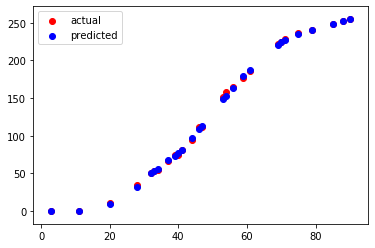

In [141]:
plt.figure()
plt.scatter(x=X_test_kor.loc[:,'tagged_day'], y=y_test_kor, color = "red", label="actual")
plt.scatter(x=X_test_kor.loc[:,'tagged_day'], y=y_pred_kor_minmax, color = "blue", label="predicted")
plt.legend()
plt.show()

# Splitting Test Train for USA

In [142]:
X_usa = dfusa.drop(labels=X_col_dropped, axis=1)

X_col_names2 = X_usa.columns.values
X_col_names

array(['confirmed', 'tagged_day', 'Total tests per million people'],
      dtype=object)

In [143]:
y_usa = dfusa.loc[:,'deaths']

In [144]:
X_train_usa, X_test_usa, y_train_usa, y_test_usa = train_test_split(X_usa, y_usa, test_size=0.3, random_state=1)
print(len(X_train_usa),len(y_train_usa))
print(len(X_test_usa),len(y_test_usa))

50 50
22 22


# SVR for USA with minmax scaling

In [145]:
min_max_scaler = MinMaxScaler()
X_train_usa_minmax = min_max_scaler.fit_transform(X_train_usa)# fit training set
X_test_usa_minmax = min_max_scaler.transform(X_test_usa)# test set transform only, no fit
X_test_usa_minmax

array([[2.22203770e-03, 2.67605634e-01, 4.16812917e-03],
       [6.30040688e-01, 7.74647887e-01, 5.15838891e-01],
       [1.37839409e-04, 1.40845070e-01, 0.00000000e+00],
       [9.40370340e-01, 9.57746479e-01, 9.02027027e-01],
       [5.80964046e-01, 7.46478873e-01, 4.74903475e-01],
       [2.12148136e-02, 3.66197183e-01, 2.72025272e-02],
       [2.28610811e-01, 5.49295775e-01, 1.91163566e-01],
       [6.07943204e-01, 7.60563380e-01, 4.93769744e-01],
       [1.00817072e-01, 4.64788732e-01, 1.01658477e-01],
       [7.21679814e-01, 8.30985915e-01, 6.22235872e-01],
       [2.56247613e-01, 5.63380282e-01, 2.21481221e-01],
       [6.95715353e-02, 4.36619718e-01, 7.41488241e-02],
       [4.98214731e-06, 2.81690141e-02, 0.00000000e+00],
       [4.82079216e-01, 6.90140845e-01, 3.94392769e-01],
       [1.34335299e-01, 4.92957746e-01, 1.28992629e-01],
       [2.02251100e-01, 5.35211268e-01, 1.73613549e-01],
       [7.53964959e-04, 2.11267606e-01, 1.18462618e-03],
       [6.51228930e-01, 7.88732

In [146]:
start_time = time.time()
param_grid = {'C': [10,400,500,600,750,], 'gamma': [30,20,10,2,1.75,1],'kernel': ['rbf', 'poly', 'sigmoid', 'linear']}
grid = GridSearchCV(SVR(),param_grid,refit=True,verbose=2)
grid.fit(X_train_usa_minmax,y_train_usa)
print(grid.best_estimator_)
print("time taken for grid search = ", time.time() - start_time)

# Results: 
#SVR(C=750, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma=10,
#    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
#time taken for grid search =  448.8078908920288

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV] C=10, gamma=30, kernel=rbf ......................................
[CV] ....................... C=10, gamma=30, kernel=rbf, total=   0.0s
[CV] C=10, gamma=30, kernel=rbf ......................................
[CV] ....................... C=10, gamma=30, kernel=rbf, total=   0.0s
[CV] C=10, gamma=30, kernel=rbf ......................................
[CV] ....................... C=10, gamma=30, kernel=rbf, total=   0.0s
[CV] C=10, gamma=30, kernel=rbf ......................................
[CV] ....................... C=10, gamma=30, kernel=rbf, total=   0.0s
[CV] C=10, gamma=30, kernel=rbf ......................................
[CV] ....................... C=10, gamma=30, kernel=rbf, total=   0.0s
[CV] C=10, gamma=30, kernel=poly .....................................
[CV] ...................... C=10, gamma=30, kernel=poly, total=   0.0s
[CV] C=10, gamma=30, kernel=poly .....................................
[CV] .........

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s


[CV] C=10, gamma=2, kernel=linear ....................................
[CV] ..................... C=10, gamma=2, kernel=linear, total=   0.0s
[CV] C=10, gamma=2, kernel=linear ....................................
[CV] ..................... C=10, gamma=2, kernel=linear, total=   0.0s
[CV] C=10, gamma=2, kernel=linear ....................................
[CV] ..................... C=10, gamma=2, kernel=linear, total=   0.0s
[CV] C=10, gamma=1.75, kernel=rbf ....................................
[CV] ..................... C=10, gamma=1.75, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1.75, kernel=rbf ....................................
[CV] ..................... C=10, gamma=1.75, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1.75, kernel=rbf ....................................
[CV] ..................... C=10, gamma=1.75, kernel=rbf, total=   0.0s
[CV] C=10, gamma=1.75, kernel=rbf ....................................
[CV] ..................... C=10, gamma=1.75, kernel=rbf, total=   0.0s
[CV] C

[Parallel(n_jobs=1)]: Done 600 out of 600 | elapsed:    5.5s finished


In [147]:
y_pred_usa_minmax = grid.best_estimator_.predict(X_test_usa_minmax)
y_pred_usa_minmax

array([6.89205318e+01, 4.12027406e+04, 9.12076618e+00, 6.53170204e+04,
       3.68161092e+04, 4.20604875e+02, 9.63658980e+03, 3.90806044e+04,
       2.95346508e+03, 4.94524297e+04, 1.12276827e+04, 1.77945495e+03,
       1.61349600e-01, 2.82294764e+04, 4.48476592e+03, 8.09951618e+03,
       3.16906289e+01, 4.33938448e+04, 3.67141101e+03, 6.26794326e+04,
       4.73635215e+04, 6.91605445e+04])

In [148]:
mse = mean_squared_error(y_test_usa,y_pred_usa_minmax)
mae = mean_absolute_error(y_test_usa,y_pred_usa_minmax)
print("MSE for USA: %.2f" % mse)
print("MAE for USA: %.2f" % mae)
print("RMSE for USA: %.2f" % np.sqrt(mse))
# print("Coefficient of determination for USA: %.2f" % r2_score)

MSE for USA: 154851.30
MAE for USA: 288.52
RMSE for USA: 393.51


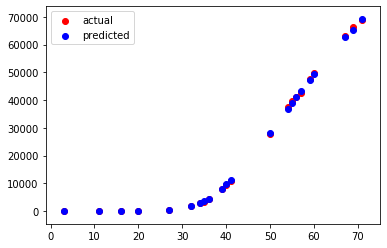

In [150]:
plt.figure()
plt.scatter(x=X_test_usa.loc[:,'tagged_day'], y=y_test_usa, color = "red", label="actual")
plt.scatter(x=X_test_usa.loc[:,'tagged_day'], y=y_pred_usa_minmax, color = "blue", label="predicted")
plt.legend()
plt.show()

# XGB Model for Korea using minmax scaling

In [151]:
learning_rate_range = [0.01, 0.025,0.05, 0.1, 0.15, 0.2]
max_depth_range = [1,2,3,4,5]
subsample_range = [0.25, 0.5,1, 1.5]
n_estimators_range = [400, 600,800,1000, 1200]

param_grid = dict(learning_rate=learning_rate_range, max_depth=max_depth_range,
                  subsample=subsample_range, n_estimators=n_estimators_range)
param_grid

{'learning_rate': [0.01, 0.025, 0.05, 0.1, 0.15, 0.2],
 'max_depth': [1, 2, 3, 4, 5],
 'subsample': [0.25, 0.5, 1, 1.5],
 'n_estimators': [400, 600, 800, 1000, 1200]}

In [152]:
start_time = time.time()
grid = GridSearchCV(XGBRegressor(n_jobs=-1), 
                    param_grid=param_grid, 
                    n_jobs=-1)
grid.fit(X_train_kor_minmax, y_train_kor)
print(grid.best_estimator_)
print("time taken for grid search = ", time.time() - start_time)

[05:26:47] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.01, max_delta_step=0,
             max_depth=3, min_child_weight=1, missing=None, n_estimators=1200,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.5, verbosity=1)
time taken for grid search =  109.42168736457825


In [153]:
y_pred_kor_minmax = grid.best_estimator_.predict(X_test_kor_minmax)
y_pred_kor_minmax

array([1.77990860e+02, 2.41276550e+02, 9.42500763e+01, 1.68207687e+02,
       2.52499420e+02, 2.36029327e+02, 1.84754761e+02, 1.49504700e+02,
       1.14569695e+02, 7.74661865e+01, 8.06721573e+01, 4.80339317e+01,
       2.27548096e+02, 2.95650978e+01, 7.54876556e+01, 2.20401947e+02,
       2.52581239e-02, 2.52581239e-02, 2.52499420e+02, 2.30411606e+02,
       1.54563538e+02, 9.96641541e+00, 2.48976532e+02, 6.93664322e+01,
       5.74327164e+01, 5.64133530e+01, 1.14569695e+02], dtype=float32)

In [154]:
mse = mean_squared_error(y_test_kor,y_pred_kor_minmax)
mae = mean_absolute_error(y_test_kor,y_pred_kor_minmax)
# r2_score = r2_score(y_test_kor,y_pred_kor_minmax)
print("MSE for South Korea: %.2f" % mse)
print("MAE for South Korea: %.2f" % mae)
print("RMSE for South Korea: %.2f" % np.sqrt(mse))
# print("Coefficient of determination for South Korea: %.2f" % r2_score)

MSE for South Korea: 5.60
MAE for South Korea: 1.87
RMSE for South Korea: 2.37


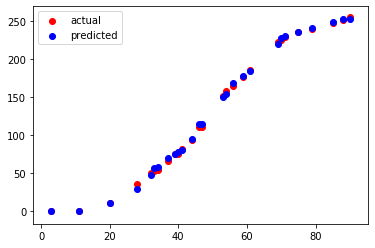

In [156]:
plt.figure()
plt.scatter(x=X_test_kor.loc[:,'tagged_day'], y=y_test_kor, color = "red", label="actual")
plt.scatter(x=X_test_kor.loc[:,'tagged_day'], y=y_pred_kor_minmax, color = "blue", label="predicted")
plt.legend()
plt.show()

# XGB Model for USA

In [157]:
learning_rate_range = [0.01, 0.025,0.05, 0.1, 0.15, 0.2]
max_depth_range = [1,2,3,4,5]
subsample_range = [0.25, 0.5,1, 1.5]
n_estimators_range = [400, 600,800,1000, 1200]

param_grid = dict(learning_rate=learning_rate_range, max_depth=max_depth_range,
                  subsample=subsample_range, n_estimators=n_estimators_range)
param_grid

{'learning_rate': [0.01, 0.025, 0.05, 0.1, 0.15, 0.2],
 'max_depth': [1, 2, 3, 4, 5],
 'subsample': [0.25, 0.5, 1, 1.5],
 'n_estimators': [400, 600, 800, 1000, 1200]}

In [158]:
start_time = time.time()
grid = GridSearchCV(XGBRegressor(n_jobs=-1), 
                    param_grid=param_grid, 
                    n_jobs=-1)
grid.fit(X_train_usa_minmax, y_train_usa)
print(grid.best_estimator_)
print("time taken for grid search = ", time.time() - start_time)

[05:28:55] WARNING: src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.025, max_delta_step=0,
             max_depth=5, min_child_weight=1, missing=None, n_estimators=1000,
             n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=0.25, verbosity=1)
time taken for grid search =  128.27324962615967


In [159]:
y_pred_usa_minmax = grid.best_estimator_.predict(X_test_usa_minmax)
y_pred_usa_minmax

array([6.2870884e+01, 4.0652551e+04, 1.3021828e+01, 6.6968742e+04,
       3.5588836e+04, 4.2735355e+02, 9.4699932e+03, 3.8676043e+04,
       3.6199087e+03, 4.7862699e+04, 1.1215081e+04, 1.9992395e+03,
       5.4464900e-01, 2.8996744e+04, 5.1954429e+03, 7.3902100e+03,
       3.0398708e+01, 4.3525176e+04, 4.9662192e+03, 6.2619441e+04,
       4.6302715e+04, 6.8544758e+04], dtype=float32)

In [160]:
mse = mean_squared_error(y_test_usa,y_pred_usa_minmax)
mae = mean_absolute_error(y_test_usa,y_pred_usa_minmax)
print("MSE for USA: %.2f" % mse)
print("MAE for USA: %.2f" % mae)
print("RMSE for USA: %.2f" % np.sqrt(mse))


MSE for USA: 756751.61
MAE for USA: 652.67
RMSE for USA: 869.91


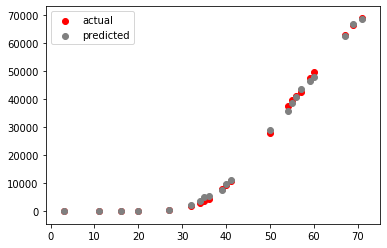

In [162]:
plt.figure()
plt.scatter(x=X_test_usa.loc[:,'tagged_day'], y=y_test_usa, color = "red", label="actual")
plt.scatter(x=X_test_usa.loc[:,'tagged_day'], y=y_pred_usa_minmax, color = "grey", label="predicted")
plt.legend()
plt.show()

# Logistic Model for Korea

In [163]:
# Split sequentially into train and test
X_train_kor = dfkor['tagged_day'].iloc[0:50]
y_train_kor = dfkor['deaths'].iloc[0:50]
X_test_kor = dfkor['tagged_day'].iloc[51:]
y_test_kor = dfkor['deaths'].iloc[51:]

In [164]:
print( len(X_train_kor), len(y_train_kor) )
print( len(X_test_kor), len(y_test_kor) )

50 50
39 39


In [165]:
def logistic_model(x, a, b, c):
    """"Uses Logistic Model (https://en.wikipedia.org/wiki/Logistic_regression) to fit the curve of infected
        individuals to a Logistic Curve f(x, a, b, c) = c / (1 + exp(-(x-b)/a))
        Parameters:
        - x : (float) Time to evaluate the infected curve
        - a, b, c : (float) Logistic Curve paramters"""
    return c / (1 + a * np.exp(-b * x))



In [166]:
# initializing parameters
a0 = y_train_kor.min()
# b0 = np.random.exponential(size=1)[0]
# b0 = np.random.uniform(low=0.0, high=0.01, size=1)[0]
b0 = 0.024 # south korea mortality rate for covid: 2.4% (https://coronavirus.jhu.edu/data/mortality)
c0 = 51.64e6
# 51.64e6 # max people that can get infected - population of South Korea in 2018 (https://www.worldometers.info/world-population/south-korea-population/)
p0 = np.array([a0,b0,c0])
p0

array([0.000e+00, 2.400e-02, 5.164e+07])

In [167]:


bounds = (0, [c0,1.0,c0])



In [168]:
(a,b,c),cov = optim.curve_fit(logistic_model, X_train_kor, y_train_kor, bounds=bounds, p0=p0)

In [169]:
a,b,c

(168.28192472543918, 0.13102329523260725, 153.74272197028483)

Text(0, 0.5, 'Deaths')

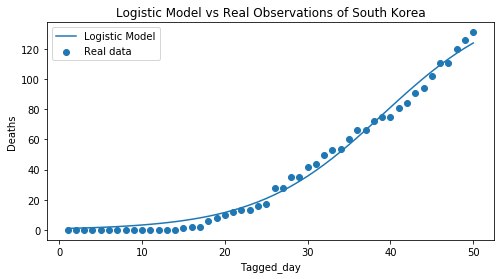

In [170]:


# model predictions on training dataset for South Korea
plt.figure(figsize=(8,4))
plt.scatter(X_train_kor, y_train_kor)
plt.plot(X_train_kor, logistic_model( X_train_kor, a, b, c))
plt.title('Logistic Model vs Real Observations of South Korea')
plt.legend(['Logistic Model', 'Real data'])
plt.xlabel('Tagged_day')
plt.ylabel('Deaths')



In [171]:
# model predictions on testing dataset
y_test_kor_pred = round( logistic_model(X_test_kor, a, b, c) ).astype('int')
y_test_kor_pred

123    130
124    132
125    135
126    137
127    139
128    140
129    142
130    143
131    144
132    145
133    146
134    147
135    148
136    149
137    149
138    150
139    150
140    151
141    151
142    151
143    152
144    152
145    152
146    152
147    153
148    153
149    153
150    153
151    153
152    153
153    153
154    153
155    153
156    153
157    153
158    153
159    153
160    154
161    154
Name: tagged_day, dtype: int32

Text(0, 0.5, 'Deaths')

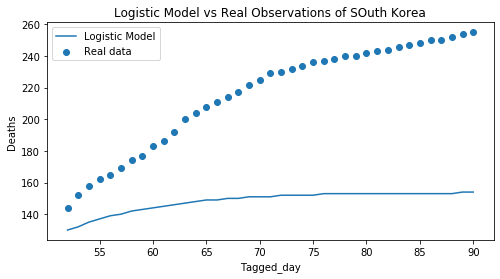

In [172]:
# model predictions on testing dataset
plt.figure(figsize=(8,4))
plt.scatter(X_test_kor, y_test_kor)
plt.plot(X_test_kor, y_test_kor_pred)
plt.title('Logistic Model vs Real Observations of SOuth Korea')
plt.legend([ 'Logistic Model', 'Real data'])
plt.xlabel('Tagged_day')
plt.ylabel('Deaths')

In [173]:
mse = mean_squared_error(y_test_kor,y_test_kor_pred)
mae = mean_absolute_error(y_test_kor,y_test_kor_pred)
print("MSE for South Korea: %.2f" % mse)
print("MAE for South Korea: %.2f" % mae)
print("RMSE for South Korea: %.2f" % np.sqrt(mse))

MSE for South Korea: 5244.51
MAE for South Korea: 67.33
RMSE for South Korea: 72.42


# Logistic Model for USA

In [174]:
# Split sequentially into train and test
X_train_usa = dfusa['tagged_day'].iloc[0:40]
y_train_usa = dfusa['deaths'].iloc[0:40]
X_test_usa = dfusa['tagged_day'].iloc[41:]
y_test_usa = dfusa['deaths'].iloc[41:]



In [175]:
print( len(X_train_usa), len(y_train_usa) )
print( len(X_test_usa), len(y_test_usa) )

40 40
31 31


In [176]:


# initializing parameters
a0 = y_train_usa.min()
# b0 = np.random.exponential(size=1)[0]
# b0 = np.random.uniform(low=0.0, high=0.01, size=1)[0]
b0 = 0.061 # 6.1% mortality rate for USA (https://coronavirus.jhu.edu/data/mortality)
c0 = 328.2e6 # max people that can die - population of USA in 2019 (https://www.census.gov/quickfacts/fact/table/US/PST045219)
p0 = np.array([a0,b0,c0])
p0



array([0.000e+00, 6.100e-02, 3.282e+08])

In [177]:
bounds = (0, [c0,1.0,c0])

In [178]:
(a,b,c),cov = optim.curve_fit(logistic_model, X_train_usa, y_train_usa, bounds=bounds, p0=p0)

In [179]:
a,b,c

(68870.08889962062, 0.268700950799883, 23019.854331709463)

In [180]:
# model predictions on training dataset for USA
y_train_usa_pred = logistic_model( X_train_usa, a, b, c)

Text(0, 0.5, 'Deaths')

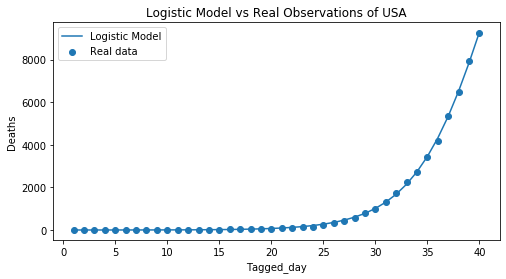

In [181]:
# model predictions on training dataset for South Korea
plt.figure(figsize=(8,4))
plt.scatter(X_train_usa, y_train_usa)
plt.plot(X_train_usa, logistic_model( X_train_usa, a, b, c))
plt.title('Logistic Model vs Real Observations of USA')
plt.legend(['Logistic Model', 'Real data'])
plt.xlabel('Tagged_day')
plt.ylabel('Deaths')

In [182]:
# model predictions on testing dataset
y_test_usa_pred = round( logistic_model(X_test_usa, a, b, c) ).astype('int')
y_test_usa_pred

41    12346
42    13860
43    15294
44    16607
45    17774
46    18782
47    19634
48    20339
49    20913
50    21374
51    21740
52    22029
53    22254
54    22430
55    22566
56    22672
57    22753
58    22815
59    22863
60    22900
61    22928
62    22950
63    22966
64    22979
65    22988
66    22996
67    23001
68    23006
69    23009
70    23012
71    23014
Name: tagged_day, dtype: int32

Text(0, 0.5, 'Deaths')

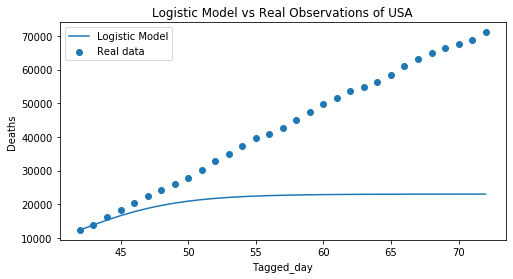

In [183]:
# model predictions on testing dataset
plt.figure(figsize=(8,4))
plt.scatter(X_test_usa, y_test_usa)
plt.plot(X_test_usa, y_test_usa_pred)
plt.title('Logistic Model vs Real Observations of USA')
plt.legend([ 'Logistic Model', 'Real data'])
plt.xlabel('Tagged_day')
plt.ylabel('Deaths')

In [184]:
mse = mean_squared_error(y_test_usa,y_test_usa_pred)
mae = mean_absolute_error(y_test_usa,y_test_usa_pred)
print("MSE for USA: %.2f" % mse)
print("MAE for USA: %.2f" % mae)
print("RMSE for USA: %.2f" % np.sqrt(mse))

MSE for USA: 703894512.16
MAE for USA: 21460.68
RMSE for USA: 26531.01


# Conclusions

SVR Korea w/ RBF 
MSE for South Korea: 3.34
MAE for South Korea: 1.37
RMSE for South Korea: 1.83

SVR USA w/ Poly
MSE for USA: 154851.30
MAE for USA: 288.52
RMSE for USA: 393.51

XGB korea
MSE for South Korea: 5.60
MAE for South Korea: 1.87
RMSE for South Korea: 2.37

XGB USA
MSE for USA: 756751.61
MAE for USA: 652.67
RMSE for USA: 869.91

Log Korea
MSE for South Korea: 5244.51
MAE for South Korea: 67.33
RMSE for South Korea: 72.42


Log USA
MSE for USA: 703894512.16
MAE for USA: 21460.68
RMSE for USA: 26531.01

The best model for South Korea from highest to lowest
- SVR w/ RBF 
- XGBoost regression
- Logistic model for regression

The best model for USA from highest to lowest
- SVR w/ Polynomial 
- XGBoost regression
- Logistic model for regression

Both countries had best predictions in SVR. The model evaluation metrics for korea are much better across each model compared to USA. 


In visualizations we notce that Korea initally has more testing density, but then U.S passes them. This early start may be the reason S. Korea had more success mitigating the spread as seen in the graphs above and below.